In [4]:
'''
Unsupervised k-means clustering on plain text file versions of EEBO-TCP texts. 
The plain text files are generated by running stageOne.py 

Produces a user-specified number of clusters based on term frequency vectorization. 
These clusters are described using the keywords found in their corresponding entries 
in a metadata CSV file also made using stageOne.py 

The vectorize and cluster functions are adapted from the EarlyPrint Lab: 
    https://earlyprint.org/jupyterbook/unsupervised.html
The pca function is adapted from Ask Python: 
    https://www.askpython.com/python/examples/plot-k-means-clusters-python 
'''
import numpy as np
import pandas as pd
from collections import defaultdict,Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# import our own utility functions 
from functions import remove_stopwords,getTexts,keywords


def vectorize(strings,ids):
    # comment below is from EarlyPrint 
    # sublinear term frequency scaling takes the log of
    # term frequencies and can help to de-emphasize function words like pronouns and articles. 
    tfidf = TfidfVectorizer(min_df=2, sublinear_tf=True)

    # Commented out portion below is for removing stopwords 
    # processed = remove_stopwords(strings)
    # newStrings = []
    # for doc in processed:
    #     str = ' '.join(doc)
    #     newStrings.append(str)
    # results = tfidf.fit_transform(newStrings)
    
    results = tfidf.fit_transform(strings) #comment this out if you choose to remove stopwords 
    return pd.DataFrame(results.toarray(), index=ids, columns=tfidf.get_feature_names_out()) # Convert information back to a DataFrame

def pca(kmeans,df):
    '''
    PCA visualization code comes from https://www.askpython.com/python/examples/plot-k-means-clusters-python 
    '''
    pca = PCA(n_components=2)
    pca_results = pca.fit_transform(df)
    label = kmeans.fit_predict(pca_results)
    u_labels = np.unique(label)
    for i in u_labels:
        plt.scatter(pca_results[label == i , 0] , pca_results[label == i , 1] , label = i)
    plt.legend()
    plt.show()

def cluster(df,ids,num):
    # Create a KMeans instance that will look for a specified number of clusters
    # Random_state parameter helps for reproducibility. 42 is a common choice 
    kmeans = KMeans(n_clusters=num, random_state=42) 
    kmeans.fit(df) 
    pca(kmeans,df)

    kmeans_groups = defaultdict(list)
    for k,v in zip(kmeans.labels_,ids):
        kmeans_groups[k].append(v)
        
    for v in kmeans_groups.values():
        print(v)

    return kmeans_groups

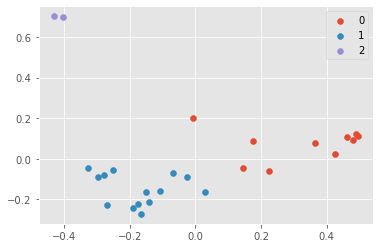

['A01932', 'A04813', 'A07886', 'A12458', 'A12460', 'A12466', 'A13290', 'A21108', 'A51598', 'A57391', 'A69149', 'A77422', 'B00052', 'B00963']
['A02495', 'A03149', 'A10821', 'A31106', 'A41427', 'A66847', 'A68617', 'A71305', 'A71306', 'A71307']
['A37936', 'A83297']
Group 1
Counter({'Great Britain': 5, 'History': 5, 'Description and travel': 4, 'Commerce': 3, 'Colonial period': 3, 'Massachusetts': 2, 'New England': 2, 'Sermons English': 2, 'Colonies': 2, 'Cape Breton Island': 1, 'Discovery and exploration': 1, 'Guyana': 1, 'East India Company': 1, 'East Indies': 1, 'Virginia': 1, 'Indians of North America': 1, 'Sermons': 1, 'OT': 1, 'Genesis XII 13': 1, 'Bible': 1, 'Colonization': 1, 'Newfoundland': 1, 'Balance of trade': 1, 'Mercantile system': 1, 'Commercial policy': 1, 'Apocalyptic literature': 1, 'Politics and government': 1, 'Fifth Monarchy Men': 1, 'Prophecies': 1, 'Europe': 1, 'Africa East': 1, 'Asia': 1, 'Canada': 1, 'America': 1, 'Charles I': 1})
Group 0
Counter({'Voyages and trav

In [7]:
folder = '/srv/data/texts'
csvFile = '/srv/data/CSVs/EPtuning.csv'
info = getTexts(folder)
df = vectorize(info[0],info[1])
groups = cluster(df,info[1],3)
words = keywords(csvFile,groups)
for k,v in groups.items():
    print(f'Group {k}')
    keyterms = []
    for name in v: 
        keyterms.extend(words[name])
    print(Counter(keyterms))